# Word2Vec

## Rédiger un notebook complet sur les plongements Word2Vec
    - Explications du principe du Word2Vec
    - Applications sur le jeu de données de votre choix
    - Une fois, le plongement fait, faire un TSNE sous les mots plongés, et afficher sur un plot quelques mots (des opposés et des synonymes)


## Principe du Word2Vec

Word2Vec est un algorithme basé sur les réseaux de neurones.
En utilisant un une quantité importante de texte sans annotations supplémentaires, word2vec apprend automatiquement des relations entre les mots.
Des vecteurs sont en sortie. Il y a un vecteur par mot avec des associations linéaires avec d'autres mots. Plus précisément, dans l'espace dimensionnel de ces vecteurs, les vecteurs proches entre eux ont des mots dont les sens sont similaires basés sur le contexte alors que ceux plus éloingnés ont des mots dont le sens est différent.
Par exemple, fort est puissant seraient plutôt proche alors que puissant et port seraient éloingnés.

Il existe deux versions du modèle word2vec.
Chacune des deux méthodes consistent en l'entraînement d'une couche cachée du réseau de neurones.
Un one-hot encoding virtuel de mots passent à travers une couche de "projection" pour aller vers la couche cachée.

### Skip-grams

Skip-grams est utilisé pour apprendre le word embedding (plongement de tokens).
Son objectif est de prédire, à partir d'un mot donné, les mots autour de celui-ci en contexte (car le contexte d'un mot influence son sens) et donc déterminer les relations sémantiques entre les mots.

### Continuous-bag-of-words

Continuous-bag-of-words est de même utilisé pour le word embedding.
Contrairement au skip-grams, cette méthode utilise plusieurs mots en entrée pour déterminer le mot central (ce qui permet aussi la détermination des relations sémantiques entre les mots).

## Application

Utilisation du jeu de données "Lee Evaluation Corpus" disponible avec l'installation de Gensim.

In [1]:
# import gensim

# Specific imports below
from gensim.test.utils import datapath
from gensim import utils
from gensim import models

In [2]:
class corpus:

    # Custom pre-processing can be handled in this class 

    def __iter__(self):
        corpus = datapath('lee_background.cor')
        for line in open(corpus):
            # Tokens seperated by a whitespace
            yield utils.simple_preprocess(line)

In [3]:
sentences = corpus()
model = models.Word2Vec(sentences = sentences)

In [7]:
model.wv.key_to_index

{'the': 0,
 'to': 1,
 'of': 2,
 'in': 3,
 'and': 4,
 'he': 5,
 'is': 6,
 'for': 7,
 'on': 8,
 'said': 9,
 'that': 10,
 'has': 11,
 'says': 12,
 'was': 13,
 'have': 14,
 'it': 15,
 'be': 16,
 'are': 17,
 'with': 18,
 'will': 19,
 'at': 20,
 'mr': 21,
 'from': 22,
 'by': 23,
 'we': 24,
 'been': 25,
 'as': 26,
 'an': 27,
 'not': 28,
 'his': 29,
 'but': 30,
 'they': 31,
 'after': 32,
 'were': 33,
 'had': 34,
 'there': 35,
 'new': 36,
 'this': 37,
 'australia': 38,
 'australian': 39,
 'who': 40,
 'palestinian': 41,
 'people': 42,
 'their': 43,
 'government': 44,
 'two': 45,
 'up': 46,
 'south': 47,
 'us': 48,
 'which': 49,
 'year': 50,
 'one': 51,
 'about': 52,
 'out': 53,
 'if': 54,
 'also': 55,
 'more': 56,
 'when': 57,
 'its': 58,
 'into': 59,
 'would': 60,
 'first': 61,
 'last': 62,
 'against': 63,
 'israeli': 64,
 'minister': 65,
 'arafat': 66,
 'over': 67,
 'all': 68,
 'three': 69,
 'afghanistan': 70,
 'united': 71,
 'world': 72,
 'no': 73,
 'or': 74,
 'police': 75,
 'than': 76,
 'att

In [4]:
# Example
vec_king = model.wv['last']
print(vec_king)

[-0.22759248  0.7135111   0.16267143  0.18226966  0.10625186 -1.0775397
  0.4975225   1.3148618  -0.18298164 -0.29649684 -0.13642173 -0.77360606
 -0.01934811  0.42534187  0.16329543  0.06730172 -0.02349175  0.00716433
 -0.32849947 -0.8936841   0.40800405  0.0825531   0.25261635  0.02272053
 -0.32636902  0.2406665  -0.29490805 -0.06477901 -0.41981208  0.1875075
  0.49383312 -0.4985222   0.49268806 -0.36926782 -0.2177844   0.6764558
  0.2867501   0.2086461  -0.36554492 -0.40529534 -0.12579711  0.02116234
 -0.24133866  0.1606474   0.41329312 -0.28015253 -0.33824012 -0.14545871
  0.16662502  0.42798743  0.22252107 -0.42722926 -0.23612928 -0.05285951
 -0.30844504  0.2211274   0.03540987 -0.05112531 -0.3536833  -0.01741843
 -0.16146877  0.01360259  0.20986283  0.00972037 -0.3675977   0.75356996
  0.2589875   0.4341207  -0.6017339   0.5474123  -0.13732009  0.15279166
  0.5845674  -0.07182977  0.5294228   0.37080267 -0.01361144 -0.24779403
 -0.46797803 -0.0952707  -0.4361443   0.0988954  -0.48

In [39]:
# Example
test = model.wv['nice']
print(test)

[-0.02166294  0.04498515  0.01360676  0.00466157  0.01269848 -0.0803922
  0.02985262  0.1077579  -0.0209144  -0.02028475 -0.00431395 -0.06167847
  0.00552057  0.02814324  0.01460457  0.01350745 -0.00268863  0.00854546
 -0.02787725 -0.06515517  0.0298244  -0.0062369   0.01042079 -0.00416669
 -0.0200542   0.0143639  -0.01808958  0.00545783 -0.02946711  0.01023708
  0.042139   -0.04180341  0.04809446 -0.03703488 -0.01468417  0.05935239
  0.01397126  0.02513648 -0.01857984 -0.0180843  -0.00541932  0.01130787
 -0.01175895  0.0157928   0.02939267 -0.03128013 -0.02188223 -0.00101605
  0.00426583  0.03263939  0.01431961 -0.0288744  -0.0143965   0.00306585
 -0.0221995   0.02863124  0.01012991 -0.01195299 -0.02287179 -0.00138794
 -0.01608976 -0.00307384  0.01844292 -0.00584288 -0.03623779  0.05839124
  0.0150734   0.03074016 -0.04018986  0.03426185 -0.0058966   0.00510417
  0.03819016 -0.00076107  0.04340433  0.02945715  0.00508206 -0.02011573
 -0.02371477 -0.01232549 -0.02469039  0.01286978 -0.

In [40]:
print(model.wv.index_to_key)

['the', 'to', 'of', 'in', 'and', 'he', 'is', 'for', 'on', 'said', 'that', 'has', 'says', 'was', 'have', 'it', 'be', 'are', 'with', 'will', 'at', 'mr', 'from', 'by', 'we', 'been', 'as', 'an', 'not', 'his', 'but', 'they', 'after', 'were', 'had', 'there', 'new', 'this', 'australia', 'australian', 'who', 'palestinian', 'people', 'their', 'government', 'two', 'up', 'south', 'us', 'which', 'year', 'one', 'about', 'out', 'if', 'also', 'more', 'when', 'its', 'into', 'would', 'first', 'last', 'against', 'israeli', 'minister', 'arafat', 'over', 'all', 'three', 'afghanistan', 'united', 'world', 'no', 'or', 'police', 'than', 'attacks', 'fire', 'before', 'some', 'security', 'day', 'you', 'states', 'could', 'them', 'say', 'today', 'now', 'told', 'time', 'any', 'laden', 'very', 'bin', 'just', 'can', 'sydney', 'what', 'still', 'company', 'president', 'man', 'four', 'taliban', 'killed', 'our', 'forces', 'al', 'around', 'being', 'days', 'west', 'old', 'other', 'officials', 'where', 'so', 'test', 'qaeda'

#### Storing and loading models

In [41]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    # To save a model
    temporary_filepath = tmp.name
    model.save(temporary_filepath)
    
    # To load a saved model:
    new_model = models.Word2Vec.load(temporary_filepath)

### Réduction de la dimension et TSNE

In [42]:
from sklearn.decomposition import IncrementalPCA    # initial reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

In [43]:
def reduce_dimensions(model):
    num_dimensions = 2  # final nb dimensions, 2D in this example (2D, 3D, etc)
    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

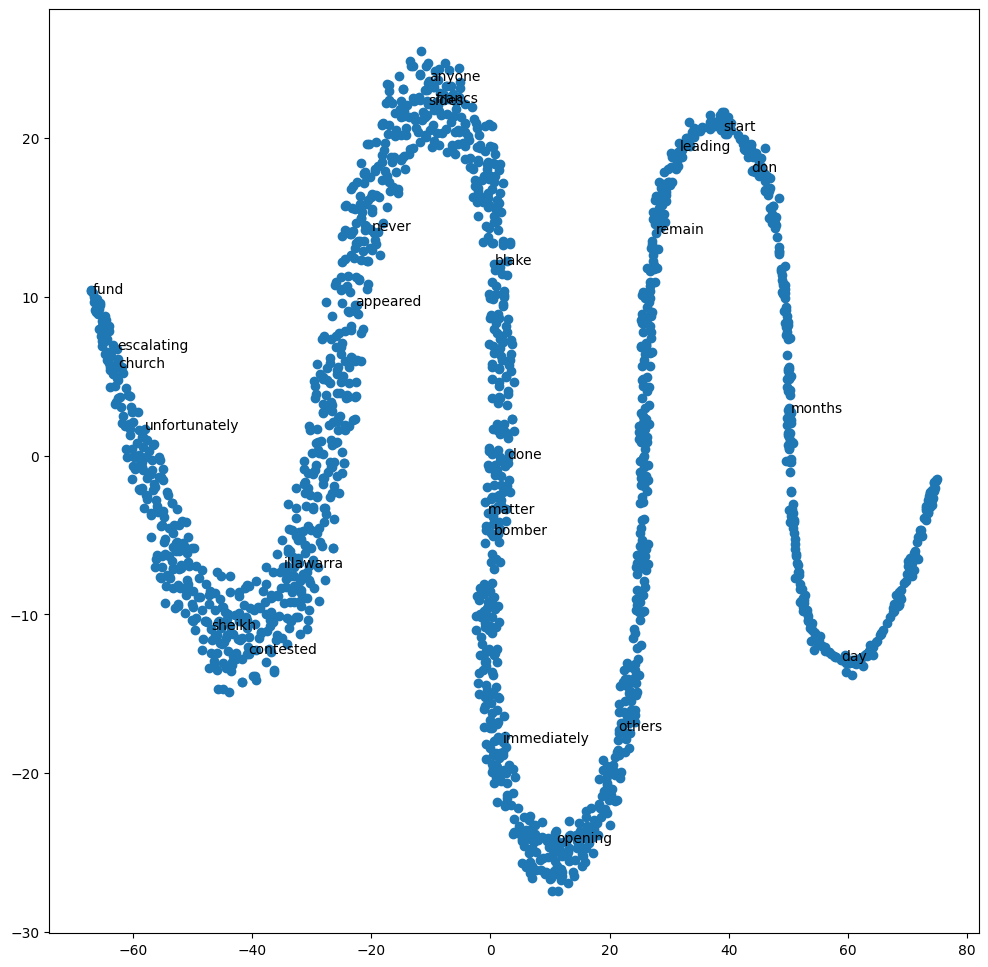

In [44]:
# Plotting using matplotlib
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Randomly samples 25 labels data points
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_with_matplotlib(x_vals, y_vals, labels)

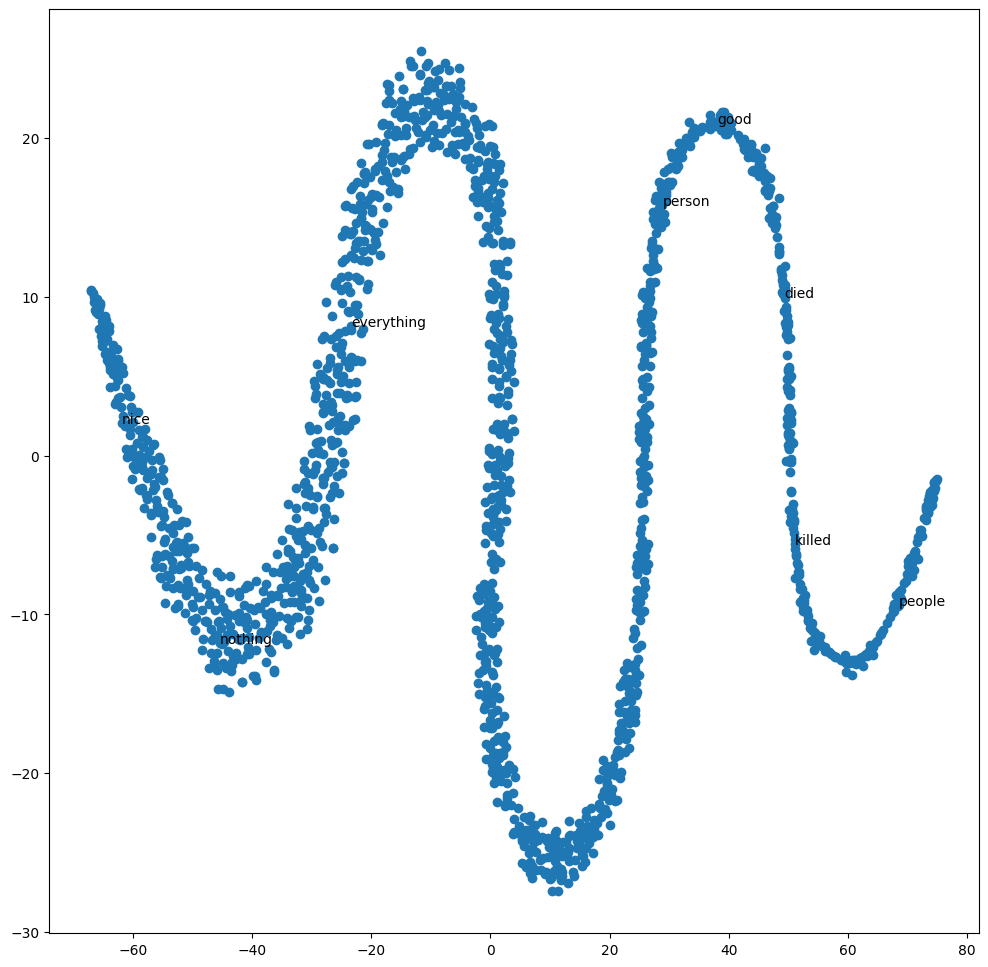

In [45]:
def plot_syn_hom_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    
    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    selected_indices = []
    selected_indices.append(1238)
    selected_indices.append(229)
    selected_indices.append(1247)
    selected_indices.append(1017)
    selected_indices.append(106)
    selected_indices.append(216)
    selected_indices.append(448)
    selected_indices.append(42)

    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_syn_hom_with_matplotlib(x_vals, y_vals, labels)   